# Solving for Orbits around Black-Holes with Numerical Integrators

Imagine a particle, located at a distance $r$ from a black-hole of mass $M$. In this module, we will explore the motion of this particle as it orbits around the black-hole, and how this motion can be used to test our understanding of gravity! Along the way, we will learn about *numerical integration*, an important tool that will allow us to use computers to solve equations that are too complicated to solve by hand. 

First, let's load some Python modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Newton's Law of Universal Gravitation

The first mathematical theory of gravity is *Newton's law of universal gravitation*, or *Newtonian gravity* for short. Named after its discoverer, Sir Isaac Newton (1643-1727), Newtonian gravity was our most accurate theory of gravity for more than 200 years. 

In Newtonian gravity, our particle feels the gravitational acceleration $\vec{a}$ given by,

\begin{equation}
\vec{a} = -\frac{G M}{r^2} \hat{r} \; ,
\end{equation}

where $G$ is the Newtonian gravitational constant $\hat{r}$ the unit vector pointing towards the black-hole. Equations like these are called *equations of motion*, and different theories of gravity prescribe different equations of motions. 

In addition to its acceleration, the particle also possesses a velocity vector, $\vec{v}$, which describes the direction and speed of the particle as it orbits the black-hole. 

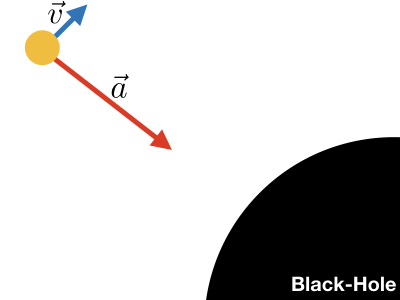

Given the mass of the black-hole in Solar masses, and the distance $r$ in AU, the following code computes the magnitude of the accleration due to Newtonian gravity. Note that it is important to **comment your code!** In Python, you can do this by surrounding your comments with triple quotes or by starting your comments with the # character.   

In [2]:
def Newton(M,r):
    """ Returns the magnitude of the Newtonian acceleration given mass M in Solar Masses and distance r in AU. """
    G = 6.673e-11       # Gravitational constant [N (m/kg)^2]
    Msol = 2.0e30       # Mass of the Sun in kg
    AU = 1.5e11         # The "astronomical unit", i.e. the Sun-Earth distance in m
    return G*(M*Msol)/(r*AU)**2.

Throughout this module, I will refer to functions in code in boldface, e.g. the previous functions is **Newton**.

What is the magnitude of the Newtonian acceleration 1 AU away from Sagittarius A\*, the black-hole at the center of the Milky Way Galaxy? Since Sagittarius A\* has 4.3 million times the mass of the Sun, we can plug M=4.3e6 into the **Newton** function:  

In [3]:
Newton(4.3e6,1)

25505.68888888889

Let's compare this to the gravitational acceleration exerted on the Earth by the Sun. We can use the **Newton** function, now with M=1:

In [4]:
Newton(1,1)

0.005931555555555556

Upon taking the ratio, we see that at the same distance, the gravitational acceleration due to Sagittarius A\* is 4.3 million times larger than that due to the Sun,

In [5]:
Newton(4.3e6,1)/Newton(1,1)

4300000.0

Now, we want to solve for the orbit of our particle. While this is doable by hand, we will instead use computers to do this task, using a technique called *numerical integration*. The importance of numerical integrations cannot be overstated. This technique is ubiquitous in the physics literature as professional physicists often have to work with equations that are too complex to be solved by pen-and-paper. 

# Numerical Integration



Let's consider a much simpler problem: a ball starts at position $x=0$, and possess a constant velocity $v$. 
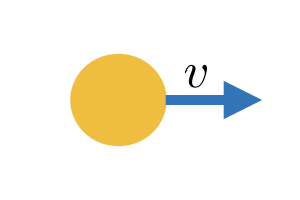

What is the distance travelled by the ball at time $\tau$ later? We can solve this by performing the integral,

$$
x(\tau) = \int_0^\tau v dt = v\tau \; .
$$

As the integral is just a multiplication, we can easily write this up in code:

In [6]:
def ConstantBall(v,tau):
    ''' Integrates the motion of a ball moving with constant velocity v for time tau'''    
    
    return v*tau

Try it out, with $v$=1 and $\tau$=1,

In [7]:
ConstantBall(1,1)

1

## Ball with Changing Velocity

What if the ball's velocity is position dependent, i.e. $v=v(x)$? The integral becomes,

$$
x(\tau) = \int_0^\tau v(x) dt \; .
$$

Because the position itself depends on time, $x=x(t)$, the velocity inside the integral now also depends on time, $v=v(x(t))$. This is now a much more difficult problem!

Depending on what the $v(x)$ function is, this equation can be very difficult to solve by hand. We can solve it *numerically* by making the approximation that for a small chunk of time $T$, the ball's velocity is approximately constant. Pictorially,

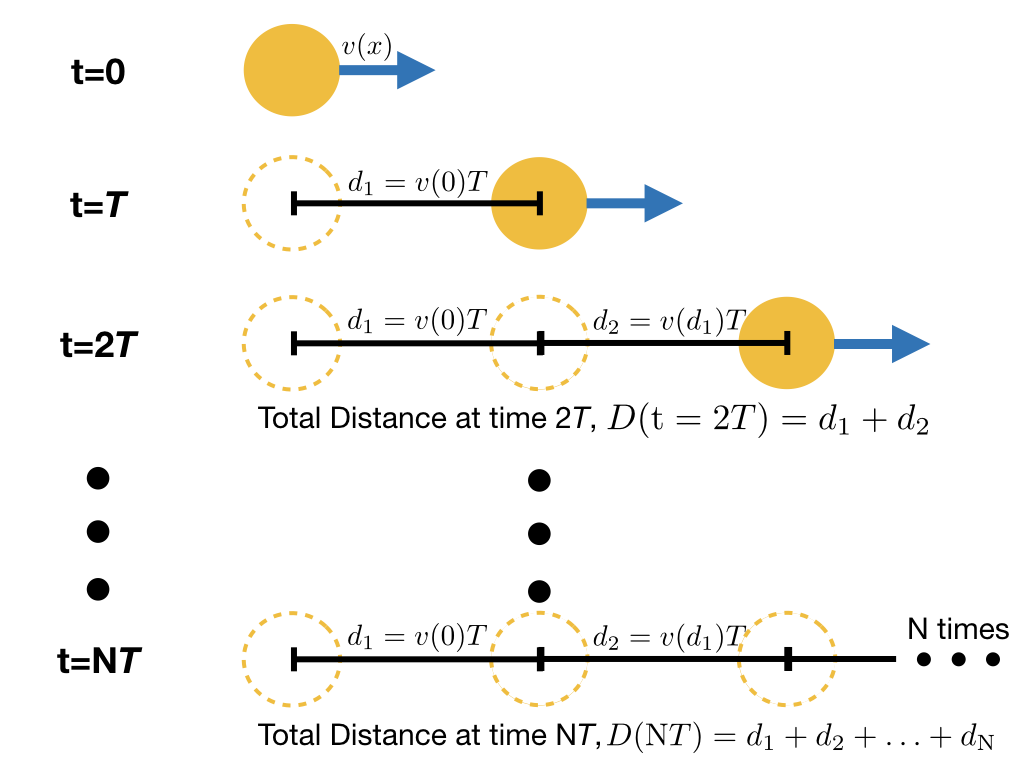

At $t=0$, the ball is at $x=0$, moving with some velocity $v(0)$. At $t=T$, the ball moves a distance $d_1=v(0)T$. This is the approximation that the velocity is constant for a small amount of time $T$,

$$
x(T) = \int_0^T v(x) dt \approx v(0)T \; .
$$

At $t=2T$, the ball moves a further distance $d_2=v(d_1)T$, or in equations,

$$
x(2T) = \int_0^T v(x) dt + \int_T^{2T} v(x) dt \approx v(0)T + v(d_1)T \; .
$$

By breaking up the integral into N *timesteps*, each of length $T$, we can approximate the integral of the motion for the entire length of time $\tau=\text{N}T$ as 

$$
x(\tau) = \int_0^T v(x) dt + \int_T^{2T} v(x) + \ldots + \int_{(\text{N}-1)T}^{\text{N}T} v(x) dt \approx v(0)T + v(d_1)T + \ldots + v(d_{(\text{N}-1)})T \; .
$$

This can be tricky to understand at first; take your time to go over the explanation multiple times before you proceed. Answer the following question: **When is this approximation valid?**

We can write our numerical integration in code:

First, we write a function for the velocity, which we will call **velocity**:

In [8]:
def velocity(x):
    ''' Returns the velocity of the ball, as a function of position, x. '''
    return x

I wrote this function to return $x$, so my velocity is $v(x)=x$. You can make **velocity** return any $v(x)$ that you want.  

Next, we write up our numerical integral:

In [9]:
def MyFirstIntegrator(x0,T,N):

    ''' Integrates the motion of a ball moving with velocity v(x) for time NT. ''' 
    
    # Generates an array of N zeros, the nth entry of this array represents the position of the ball at time t=nT
    xlist = np.zeros(N)
    
    # Initial condition: the ball starts at x=x0, so the 0th entry of xlist is x0
    xlist[0] = x0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        xlist[n+1] = xlist[n] + T*velocity(xlist[n]) # Here we call the velocity function that we defined earlier

    # Plot the resulting motion
    plt.figure()
    # Note the x-axis: np.arrange(N) produces the array (0,1,2,...,N). We multiply this by T because each timestep is of length T. 
    plt.plot(np.arange(N)*T,xlist, 'g')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x$")
    plt.grid()
    
    # Returns the array of x's: position of the ball as a function of time.
    return xlist

I have added a new parameter, $x_0$ (written as x0, without subscript, in Python). This is the position of the ball at $t=0$. There is no reason why we should restrict our integrator to a ball that starts at $x=0$!

Let's use $v(x)=x$ with $x_0$=1 for now. The equation we are solving is therefore,

$$
x(\tau) = \int_1^{\tau} x(t) dt \; .
$$

Taking the derivative of both sides, this equation is equivalent to 

$$
\frac{\text{d}x}{\text{d}t} = x \;\;\;\; ; \;\;\;\; x(0)=1 \; ,
$$

which I know the answer to, $ x(\tau) = e^{\tau}$. **Compare our numerical integration results to this known answer!** Play around with x0, T and N, how do these parameters change the plot and our comparison?

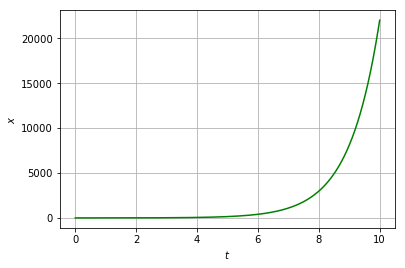

In [15]:
xarray = MyFirstIntegrator(x0=1,T=0.0001,N=100000)

In [11]:
xarray[60000]

403.30779107272076

In [12]:
np.exp(6)

403.42879349273511

## The Accelerating Ball

As exemplified at the end of the last section, our integral,

$$
x(\tau) = \int_{x_0}^\tau v(x) dt \; ,
$$

can be written as 

$$
\frac{\text{d}x}{\text{d}t} = v \;\;\;\; ; \;\;\;\; x(0)=x_0 \; .
$$

Now, what if we do not know $v(x)$ explicitly, but we know its *acceleration*? As the acceleration, $a$, is the rate of change of velocity, we now have another equation

$$
\frac{\text{d}v}{\text{d}t} = a \;\;\;\; ; \;\;\;\; x(0)=v_0 \; ,
$$

where $v_0$ is the initial velocity of the ball, much like $x_0$ is the initial position of the ball. Note that like $v$, $a$ can have dependences on our other variables, i.e. $a=a(x,v)$. We now want to simultaneously solve for both of these equations at once.

This is easier than you might think, as the second equation is identical to the first if I just change $v \rightarrow x$ and $a \rightarrow v$. We can then solve the second equation with the exact same method as we did the first equation. 

See if you can follow this logic in the following code by comparing it to **MyFirstIntegrator**. This new function should look almost identical to rewriting **MyFirstIntegrator** twice, once for $x$ and once for $v$:

In [16]:
def acceleration(x,v):
    
    ''' Returns the acceleration of the ball, as a function of position, x and velocity, v. '''
    
    return -x

def AcceleratingBall(x0,v0,T=0.1,N=1000):
    
    ''' Integrates the motion of a ball moving with acceleration a(x,v) for time NT. ''' 
        
    # Generates an array of N zeros, the nth entry of this array represents the position of the ball at time t=nT
    xlist = np.zeros(N)
    # Generates an array of N zeros, the nth entry of this array represents the velocity of the ball at time t=nT
    vlist = np.zeros(N)

    # Initial condition: the ball starts at x=x0, so the 0th entry of xlist is x0
    xlist[0] = x0
    # Initial condition: the ball starts at v=v0, so the 0th entry of xlist is v0
    vlist[0] = v0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        xlist[n+1] = xlist[n] + T*vlist[n] # At timestep n+1, the position is advanced by the velocity at timestep n multiplied by T.
        vlist[n+1] = vlist[n] + T*acceleration(xlist[n],vlist[n]) # Here we call the acceleration function that we defined earlier

    # Plot the resulting motion
    plt.figure()
    # Note the x-axis: np.arrange(N) produces the array (0,1,2,...,N). We multiply this by T because each timestep is of length T. 
    plt.plot(np.arange(N)*T,xlist, 'g')
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x$")
    plt.grid()
    
    # Returns the array of x's: position of the ball as a function of time.
    return xlist

The *acceleration* function I defined is 

$$
a = -x \; ,
$$

which is the acceleration for a ball on a spring.

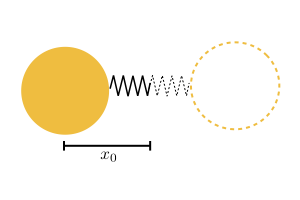

What is the motion of a ball with this acceleration? **Play with x0, v0, T, and N, what do you notice?**

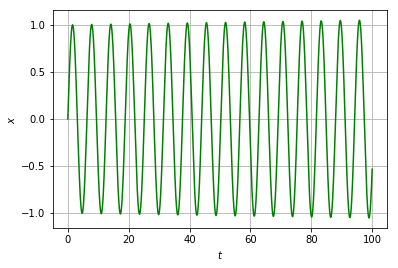

In [19]:
xarray = AcceleratingBall(x0=0,v0=1,T=0.001,N=100000)

As time progresses, the amplitude of the oscillation increases, i.e. **the energy of the system increases with time**. In reality, this should not happen because energy is conserved! This is an error in our numerical integration scheme. More complex integration schemes do not suffer from this error, but given what we have, let's try to mitigate it. ** What combination of T and N (e.g. small T and large N) mitigates this error?**

# Newton's Law, integrated

Now, we are ready to numerically integrate Newton's laws. First, let's modify the equation of motion, 

$$
\vec{a} = -\frac{G M}{r^2} \hat{r} \; ,
$$

into a different form. First, a black-hole possesses a characteristic length scale called the *Schwarzschild radius*, $r_S$, that marks the closest we can get to the black hole without being trapped inside of it, given by

$$
r_S = \frac{2 G M}{c^2} \; ,
$$

with $G$ the Newton constant, $M$ the mass of the black hole, and $c$ the speed of light. With this, the equation of motion can be rewritten as,

$$
\vec{a} = - \frac{c^2 r_S}{2 r^2} \hat{r} \; .
$$

Why do we need to do this manipulation? Well, in the next section, we will compare the Newtonian prediction to the prediction of Einstein's general relativity. It just so happens that writing the equation this way makes the comparison easier.

Next, we will use a new variable, 

$$
\rho = \frac{r}{c \sqrt{r_S}} \; .
$$

In this new variable, our equation of motion becomes

$$
\vec{a} = -\frac{1}{2 \rho^2} \hat{r} \; .
$$

The advantage of this new variable is that we no longer need to deal with annoying constants like $G$, $c$, or $M$, and can focus our energy on the interesting physics. This is also useful because **computers can have problems with really big or really small numbers**, which $G$, $M$, and $c$ are. This type of manipulation is called making the equation *dimensionless*.

Next, we break the motion of the particle into motion in the x-direction and motion in the y-direction:
Start with the equation of motion,

$$
\vec{a} = -\frac{1}{2 \rho^2} \hat{r} \; ,
$$

which breaks into its components as

$$
a_x = -\frac{1}{2 \rho^3} x \;\;\;\; ; \;\;\;\; a_y = -\frac{1}{2 \rho^3} y \; .
$$

The equation for the velocity becomes,

$$
\frac{\text{d}v_x}{\text{d}t} = a_x \;\;\;\; ; \;\;\;\; \frac{\text{d}v_y}{\text{d}t} = a_y  \; .
$$

Similarly, the equation for the position becomes,

$$
\frac{\text{d}x}{\text{d}t} = v_x \;\;\;\; ; \;\;\;\; \frac{\text{d}y}{\text{d}t} = v_y  \; .
$$

Let us define a function that computes both the velocity and acceleration at once:

In [20]:
def v_and_a(x, y, vx, vy):
    
    ''' Returns the accelerations and velocities of the system. '''
    
    rho = np.sqrt(x**2 + y**2) 
    ax = -0.5*x/rho**3
    ay = -0.5*y/rho**3
     
    # Here we return an array that contains both velocities, vx & vy, as well as both accelerations, ax & ay     
    return (vx, vy, ax, ay)

Next, we just use the same technique we used in **AcceleratingBall** twice, once for the x-direction and once for the y-direction. Again, see if you can follow this logic at work in the following code:

In [21]:
def Orbit(x0,y0,vx0,vy0,T,N):
    
    ''' Integrates the motion of a particle moving around a black-hole with Newtonian gravity. Integration is done over
     time NT. ''' 
    
    # Generates four arrays of N zeros, the nth entry of this array represents the x, y, vx, and vy at time t=nT
    xlist = np.zeros(N)
    ylist = np.zeros(N)
    vxlist = np.zeros(N)
    vylist = np.zeros(N)
    
    # Initial condition: the particle starts at x=x0, y=y0, vx=vx0, vy=vy0
    xlist[0] = x0
    ylist[0] = y0
    vxlist[0] = vx0
    vylist[0] = vy0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        # Here we call the v_and_a function that we defined earlier to give us the velocity and acceleration of the particle at that time
        xlist[n+1] = xlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[0]
        ylist[n+1] = ylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[1]
        vxlist[n+1] = vxlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[2]
        vylist[n+1] = vylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n])[3]
    
    # Plot the resulting motion
    plt.figure()
    plt.plot(xlist, ylist, 'g', [0], [0], 'ro')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()

Play around with the parameters of **Orbit**. In the previous section, we showed that an error in our integration scheme causes energy to increase. **Do we get the same error here? What can you do to mitigate this error?**

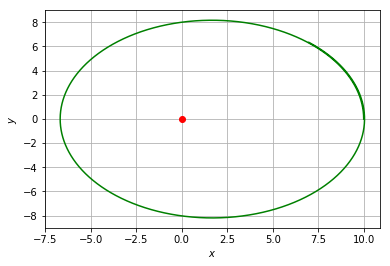

In [22]:
Orbit(x0=10,y0=0,vx0=0,vy0=0.2,T=0.01,N=25000)

# Orbits in General Relativity

In the first half of the 20th century, Albert Einstein (1879-1955) devised a theory of gravity called general relativity. Since then, general relativity has passed a battery of experimental tests and is now touted as our most accurate theory of gravity. 

Using Einstein's theory of general relativity, Karl Schwarzschild (1873-1916) derived a correction to the Newtonian gravitational equation of motion (while he was serving in the frontline during World War I!). This new equation for the accleration of a particle in general relativity, $a_{GR}$, is

\begin{align}
\vec{a}_{GR} &= \vec{a}_N - \frac{3 l^2}{2 \rho^4} \hat{r} 
\\ &= -\frac{1}{2 \rho^2}\left(1 + \frac{3 l^2}{\rho^2} \right) \hat{r} \; ,
\end{align}

where $a_N$ is the gravitational acceleration in Newton's theory, i.e. our old friend, 

$$
\vec{a} = -\frac{G M}{r^2} \hat{r} \; ,
$$

and $l$ is the angular momentum, which we can calculate using the formula 

$$
l = x v_y - y v_x \; .
$$

Let us modify **v_and_a** to return the general relativistic acceleration if a new variable, called Einstein, is set to 1:

In [23]:
def v_and_a(x, y, u, v, Einstein):
    """ Returns the accelerations and velocities of the system. If Einstein=0, returns the Newtonian gravitational
    acceleration. If Einstein=1, returns the general relativistic expression instead."""
    
    rho = np.sqrt(x**2 + y**2)
    velocity_x = u
    velocity_y = v
    
    if Einstein == 1:
        # If Einstein=1, returns the general relativistic expressions
        l = (x*v - y*u)
        acceleration_x = (-0.5*x/rho**3)*(1. + 3.*l**2/rho**2)
        acceleration_y = (-0.5*y/rho**3)*(1. + 3.*l**2/rho**2)
    elif Einstein == 0:
        # If Einstein=0, returns the Newtonian expressions
        acceleration_x = -0.5*x/rho**3
        acceleration_y = -0.5*y/rho**3
        
    # Here we return an array that contains both velocities, vx & vy, as well as both accelerations, ax & ay     
    return (velocity_x, velocity_y, acceleration_x, acceleration_y)

Now, all we have to do is to modify **Orbit** to accept this new parameter:

In [24]:
def Orbit(x0,y0,vx0,vy0,T,N,Einstein):
    
    ''' Integrates the motion of a particle moving around a black-hole with Newtonian gravity. Integration is done over
     time NT. ''' 
    
    # Generates four arrays of N zeros, the nth entry of this array represents the x, y, vx, and vy at time t=nT
    xlist = np.zeros(N)
    ylist = np.zeros(N)
    vxlist = np.zeros(N)
    vylist = np.zeros(N)
    
    # Initial condition: the particle starts at x=x0, y=y0, vx=vx0, vy=vy0
    xlist[0] = x0
    ylist[0] = y0
    vxlist[0] = vx0
    vylist[0] = vy0

    # Use a for loop to integrate N times, each integral in the loop is done over time T
    for n in range(N-1):
        # Here we call the v_and_a function that we defined earlier to give us the velocity and acceleration of the particle at that time
        xlist[n+1] = xlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[0]
        ylist[n+1] = ylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[1]
        vxlist[n+1] = vxlist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[2]
        vylist[n+1] = vylist[n] + T*v_and_a(xlist[n], ylist[n], vxlist[n], vylist[n], Einstein)[3]
    
    # Plot the resulting motion
    plt.figure()
    plt.plot(xlist, ylist, 'g', [0], [0], 'ro')
    # Title the plots, if Einstein=0 as "Newtonian Orbit" and if Einstein=1 as "Einsteinian Orbit"
    if Einstein == 0:
        plt.title("Newtonian Orbit")
    elif Einstein == 1:
        plt.title("Einsteinian Orbit")
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.grid()

Now, try out various values of the parameters x0, y0, vx0, and vy0! **Can you make qualitative statements on the differences between Newtonian and Einsteinian orbits?**

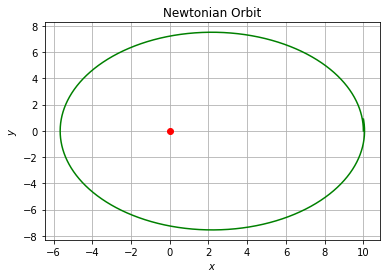

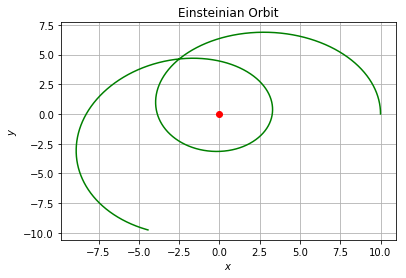

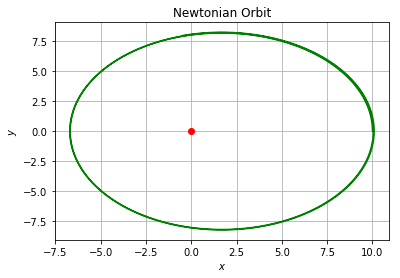

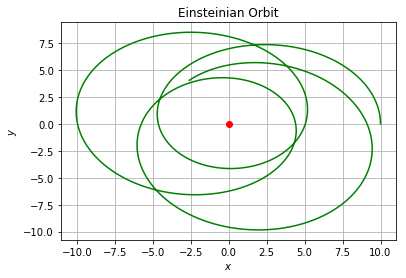

In [25]:
Orbit(x0=10,y0=0,vx0=0,vy0=0.19,T=0.01,N=20000, Einstein=0)
Orbit(x0=10,y0=0,vx0=0,vy0=0.19,T=0.01,N=20000, Einstein=1)

Orbit(x0=10,y0=0,vx0=0,vy0=0.2,T=0.01,N=50000, Einstein=0)
Orbit(x0=10,y0=0,vx0=0,vy0=0.2,T=0.01,N=50000, Einstein=1)

### Final Challenge

Suppose you have a near-infinite budget, using what you know about the orbits in these two theories of gravity, **devise an experiment to test whether Newton or Einstein is correct**!

In [ ]:
ADD ISCO